In [1]:
# the idea to do stich together several independent networks
# first layers are Tanh (smooth features)
# later layers are ReLU (jagged features)
# the input to layer layers are residuals of previous layers.

# re-running the notebook can give different results.
# highlighting the importance of re-running the same network training
# multiple times and finding the 'best' one

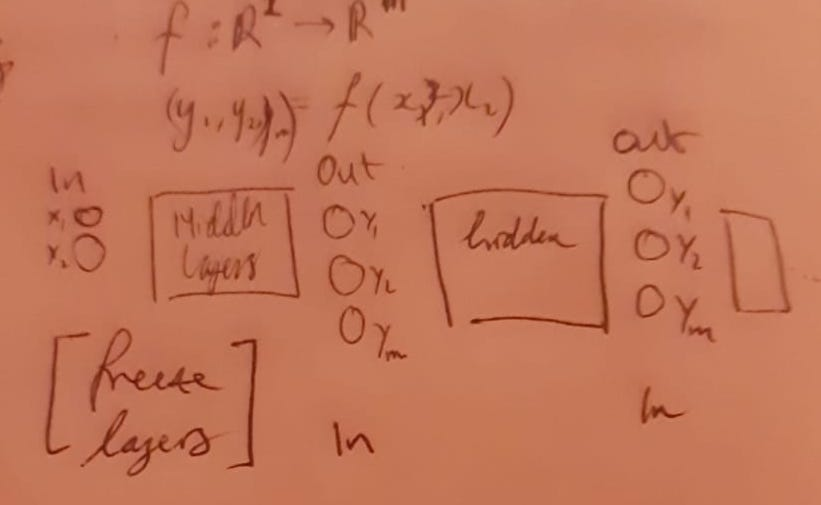

In [2]:
from IPython.display import Image
Image(filename='idea.jpeg',width=800, height=400)

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def plot_prediction_and_error(x, y, model):
    yhat = model.predict(x)
    yRes = y - yhat
    
    fig, axes = plt.subplots(1, 2, figsize=(18, 7))
    axes[0].plot(x, y)
    axes[0].plot(x, yhat)
    axes[1].plot(x, yRes)
    plt.show()
    plt.close()

In [5]:
def gen_test_data():
#     x = np.linspace(-np.pi/2., np.pi/2., 100)
    x = np.linspace(-1, 1, 100)[:,np.newaxis]
    y = np.cos(20*x) + np.sin(10*x)
#     y = np.cos(50*x) + np.sin(5*x)

    noise = np.random.normal(0, 0.1, size=x.shape)

    return x, y + noise

x, y = gen_test_data()


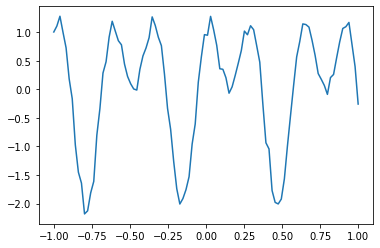

In [6]:
plt.figure()
plt.plot(x, y)
plt.show()
plt.close()

In [35]:
def get_base_model(x, y, verbose=True):

    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=(1,)),
        tf.keras.layers.Dense(200, activation='tanh'),
        tf.keras.layers.Dense(200, activation='tanh'),
        tf.keras.layers.Dense(1)
    ])
    
    optimizer = tf.keras.optimizers.Adam(0.001)
    model.compile(loss='mse', optimizer=optimizer)
    
    history = model.fit(x, y, batch_size=100, epochs=1000, verbose=verbose)
    
    return history, model

In [36]:
def get_later_model(x, y, verbose=True):

    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=(1,)),
        tf.keras.layers.Dense(200, activation='relu'),
        tf.keras.layers.Dense(200, activation='relu'),
        tf.keras.layers.Dense(1)
    ])
    
    optimizer = tf.keras.optimizers.Adam(0.001)
    model.compile(loss='mse', optimizer=optimizer)
    
    history = model.fit(x, y, batch_size=100, epochs=10000, verbose=verbose)
    
    return history, model

In [37]:
def get_later_model_2(x, y, verbose=True):

    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=(1,)),
        tf.keras.layers.Dense(200, activation='relu'),
        tf.keras.layers.Dense(200, activation='relu'),
        tf.keras.layers.Dense(200, activation='relu'),
        tf.keras.layers.Dense(200, activation='relu'),
        tf.keras.layers.Dense(1)
    ])
    
    optimizer = tf.keras.optimizers.Adam(0.001)
    model.compile(loss='mse', optimizer=optimizer)
    
    history = model.fit(x, y, batch_size=100, epochs=20000, verbose=verbose)
    
    return history, model

In [38]:
history_base, model_base = get_base_model(x, y, verbose=False)
model = model_base;

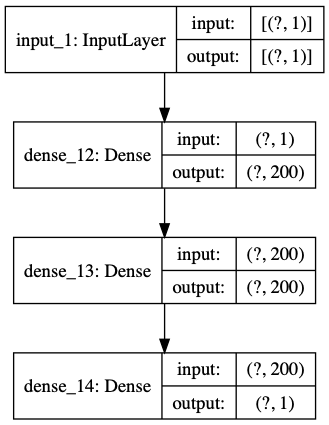

In [39]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [40]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 200)               400       
_________________________________________________________________
dense_13 (Dense)             (None, 200)               40200     
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 201       
Total params: 40,801
Trainable params: 40,801
Non-trainable params: 0
_________________________________________________________________


In [41]:
yhat = model_base.predict(x)

In [42]:
yRes = y-yhat

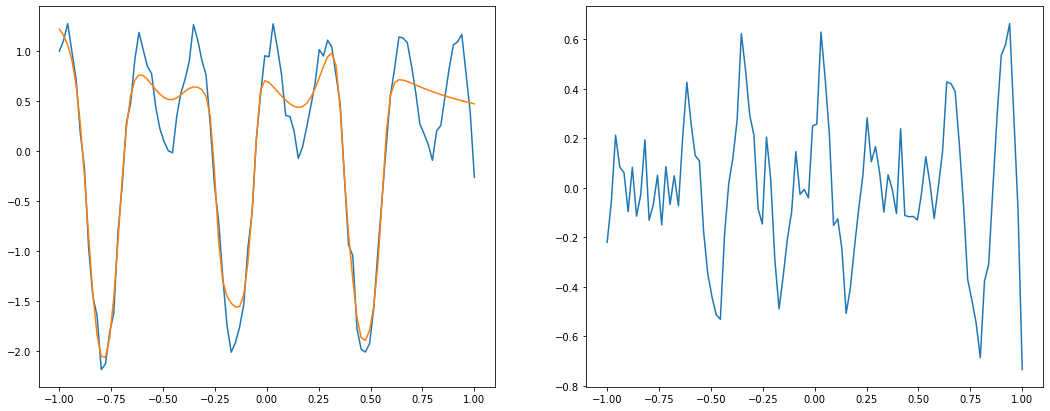

In [43]:
plot_prediction_and_error(x, y, model)

In [44]:
history2, model2 = get_later_model(x, yRes, False)

In [45]:
yhat2 = model2.predict(x)

In [46]:
yRes2 = yRes-yhat2

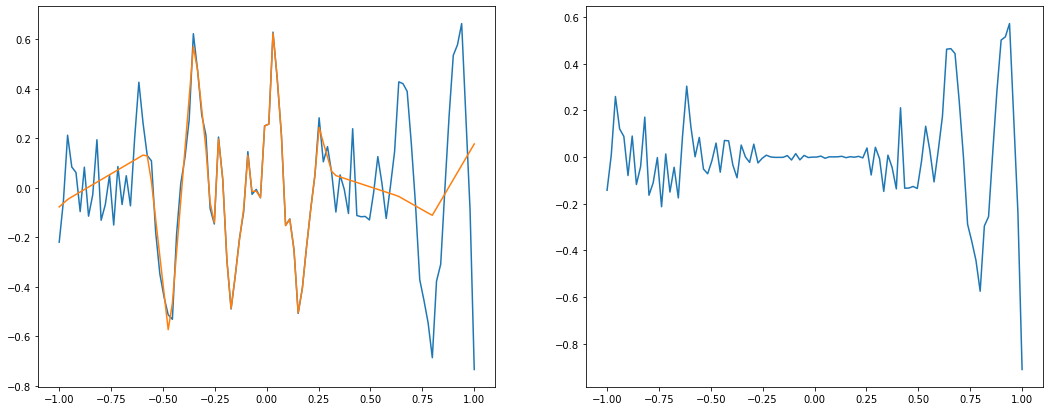

In [47]:
plot_prediction_and_error(x, yRes, model2)

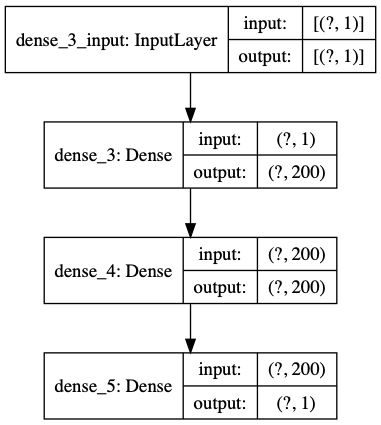

In [22]:
tf.keras.utils.plot_model(model2, show_shapes=True)

In [23]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 200)               400       
_________________________________________________________________
dense_4 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 201       
Total params: 40,801
Trainable params: 40,801
Non-trainable params: 0
_________________________________________________________________


In [50]:
history3, model3 = get_later_model(x, yRes2, False)

In [51]:
yhat3 = model3.predict(x)

In [52]:
yRes3 = yRes2-yhat3

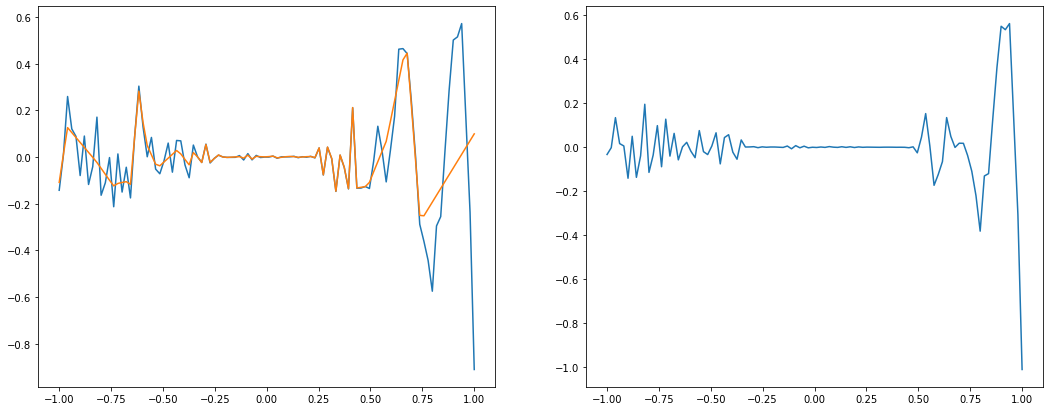

In [53]:
plot_prediction_and_error(x, yRes2, model3)

In [54]:
# here we see that the difference between model3 and model4 is basically zero
# so this is a hint that we should make the next network block more complicated
history4, model4 = get_later_model(x, yRes3, False)

In [55]:
yhat4 = model4.predict(x)

In [56]:
yRes4 = yRes3-yhat4

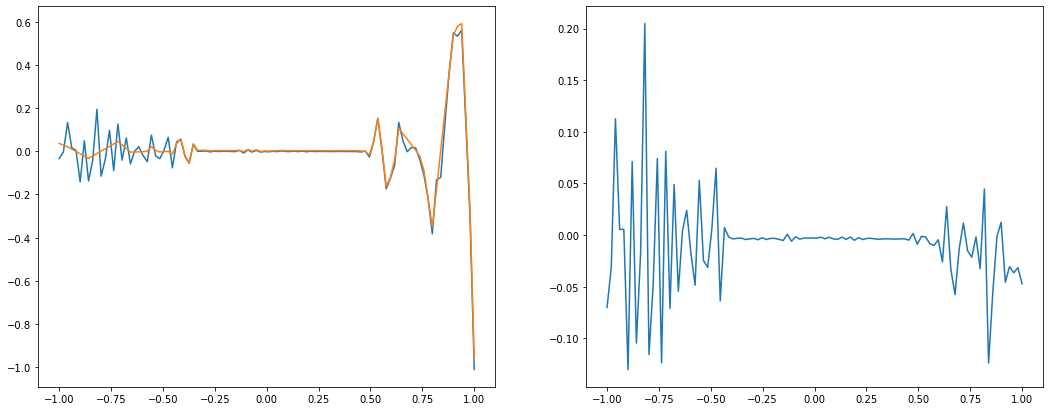

In [57]:
plot_prediction_and_error(x, yRes3, model4)

In [58]:
history5, model5 = get_later_model_2(x, yRes4, False)

In [59]:
yhat5 = model5.predict(x)

In [60]:
yRes5 = yRes4-yhat5

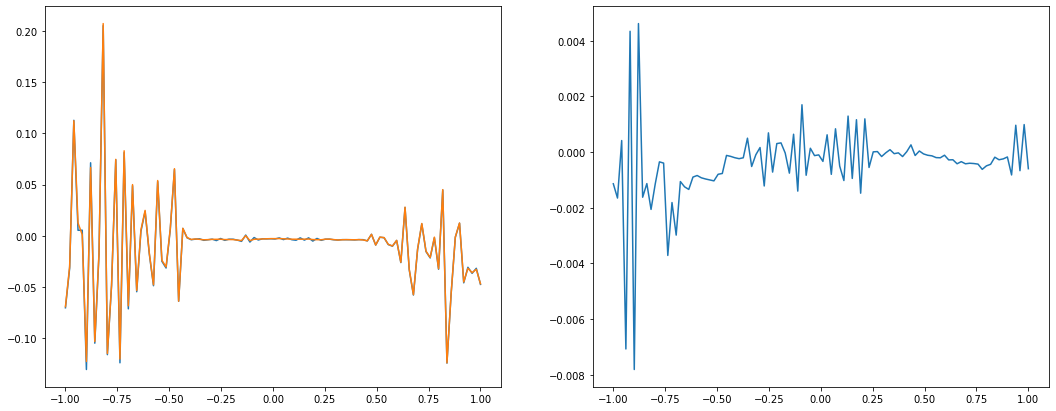

In [61]:
plot_prediction_and_error(x, yRes4, model5)

In [62]:
# scale so inpute are nicer for the ANN
history6, model6 = get_later_model_2(x, yRes5, False)

In [63]:
yhat6 = model6.predict(x)

In [64]:
yRes6 = yRes5-yhat6

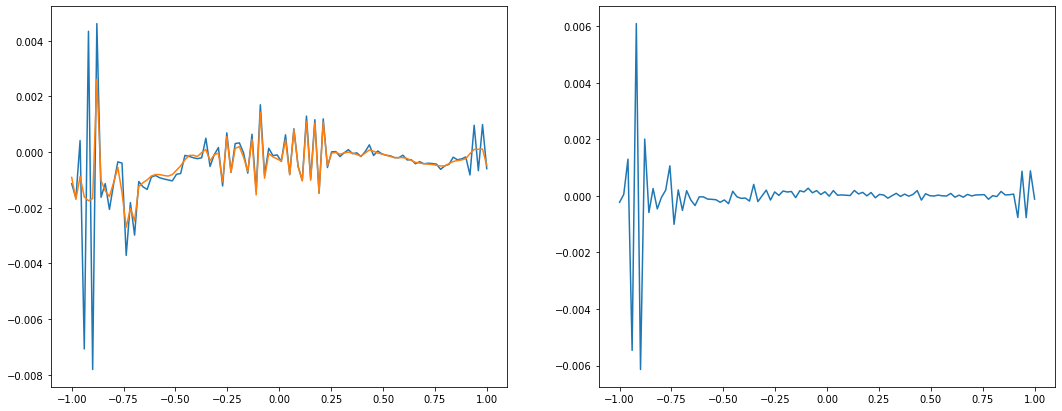

In [65]:
plot_prediction_and_error(x, yRes5, model6)

In [66]:
# scale so inpute are nicer for the ANN
history7, model7 = get_later_model_2(x, yRes6*1000, False)

In [67]:
yhat7 = model7.predict(x)

In [68]:
yRes7 = yRes6-yhat7

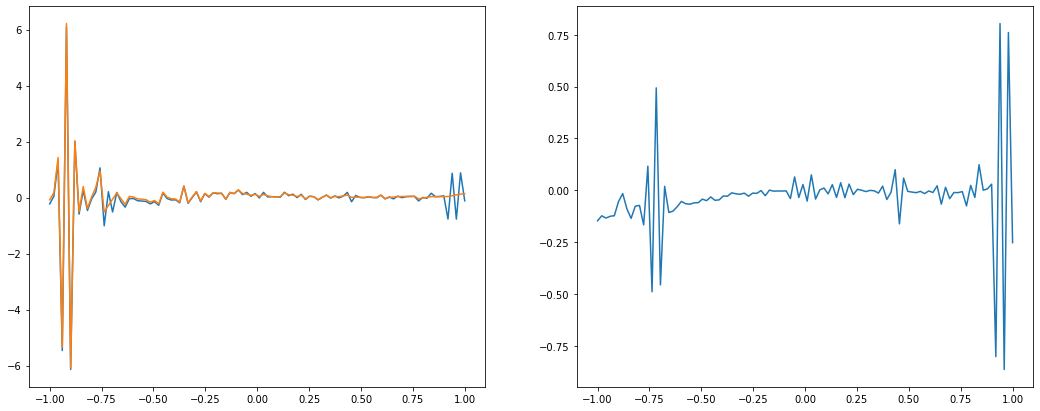

In [69]:
plot_prediction_and_error(x, yRes6*1000, model7)

In [70]:
# each level / network block basically acts to fit/model a type of feature which
# we then subtract so we can model the next feature

# add them all together

In [71]:
y_parts = [model.predict(x), model2.predict(x), model3.predict(x), model4.predict(x), model5.predict(x), model6.predict(x), model7.predict(x)/1000]

In [72]:
y_final_parts = [y_parts[0]]
for i in range(1, len(y_parts)):
    y_final_parts.append(y_final_parts[i-1] + y_parts[i])
    
    
# y_final_parts[0] = model.predict(x)
# y_final_parts[0] = y_final_parts[0] + model2.predict(x) 
    

In [73]:
y_final = np.sum(y_parts, axis=0)

In [74]:
# y_final = model.predict(x) + model2.predict(x) + model3.predict(x) + model4.predict(x) + model5.predict(x) + model6.predict(x)/1000 + model7.predict(x)

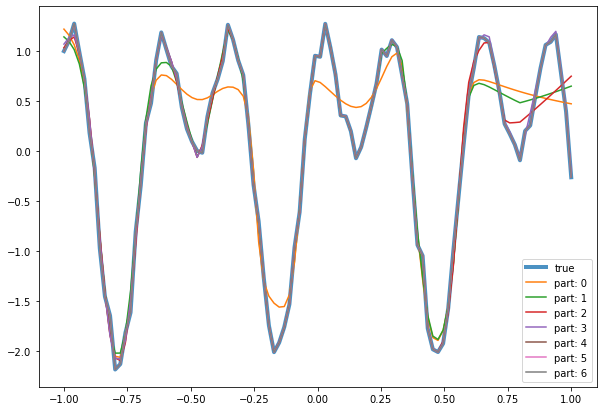

In [75]:
plt.figure(figsize=(10, 7))
plt.plot(x, y, label='true', lw=4, alpha=0.8)
for i, yp in enumerate(y_final_parts):
    plt.plot(x, yp, label=f'part: {i}')
plt.legend()

(0, 0.5)

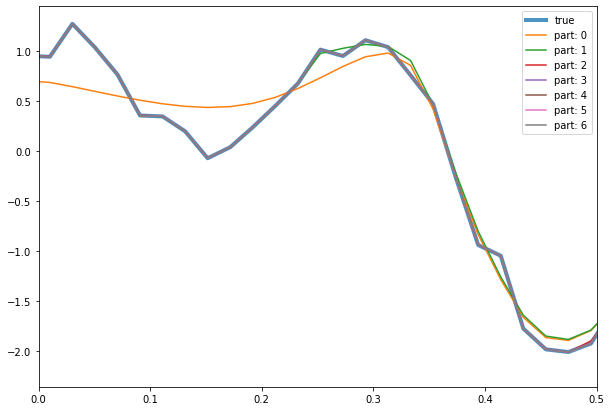

In [76]:
plt.figure(figsize=(10, 7))
plt.plot(x, y, label='true', lw=4, alpha=0.8)
for i, yp in enumerate(y_final_parts):
    plt.plot(x, yp, label=f'part: {i}')
plt.legend()
plt.xlim(0, 0.5)

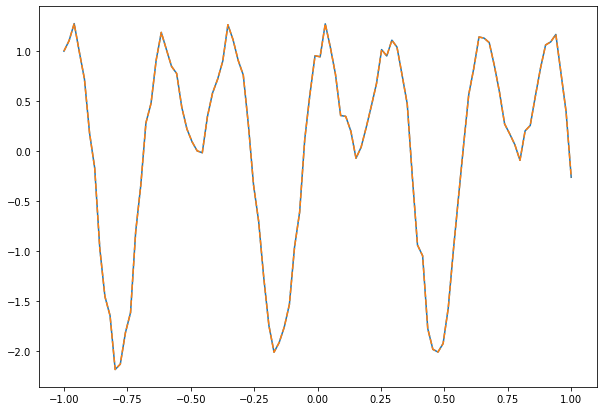

In [77]:
plt.figure(figsize=(10, 7))
plt.plot(x, y)
plt.plot(x, y_final, ls='--')

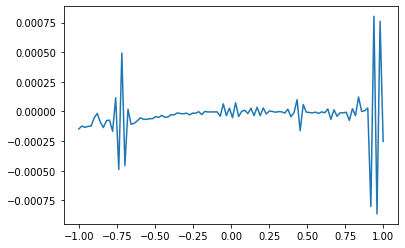

In [78]:
plt.figure()
plt.plot(x, y-y_final)

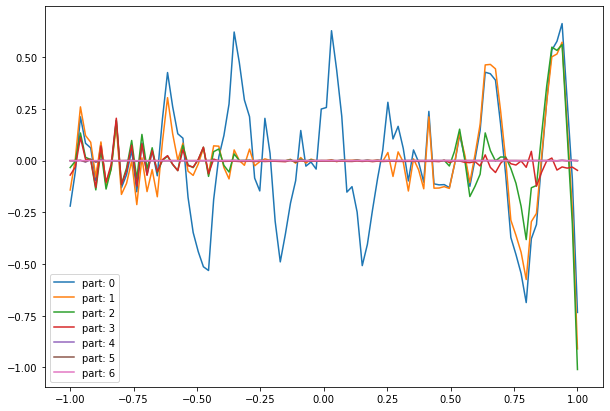

In [79]:
plt.figure(figsize=(10, 7))
for i, yp in enumerate(y_final_parts):
    plt.plot(x, y-yp, label=f'part: {i}')
plt.legend()

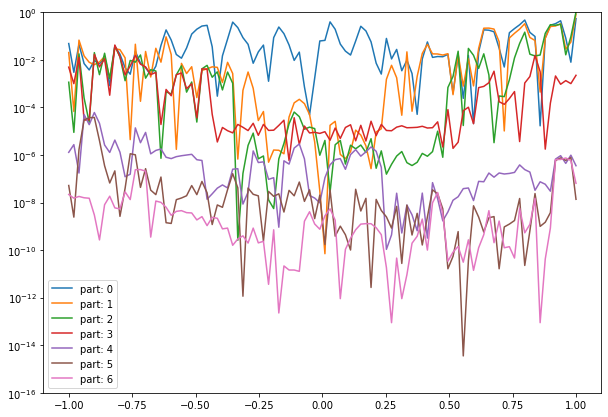

In [80]:
plt.figure(figsize=(10, 7))
for i, yp in enumerate(y_final_parts):
    plt.plot(x, tf.keras.losses.mean_squared_error(y, yp), label=f'part: {i}')
plt.yscale('log')
plt.ylim(1e-16, 1)
plt.legend()

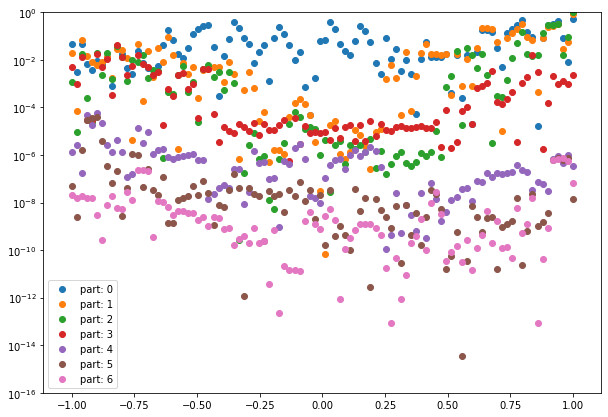

In [81]:
plt.figure(figsize=(10, 7))
for i, yp in enumerate(y_final_parts):
    plt.scatter(x, tf.keras.losses.mean_squared_error(y, yp), label=f'part: {i}')
plt.yscale('log')
plt.ylim(1e-16, 1)
plt.legend()